In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

import trecs
from trecs.models import Homogenizer, ContentFiltering, ImplicitMF
from trecs.random import Generator
from trecs.metrics import HomogeneityMeasurement, RecSimilarity, InteractionSimilarity

In [2]:
num_users = 100
num_items = 10000
num_attrs = 20
startup_iters=10


sim_iters = 290
# simpler way to pass common arguments
init_params = {
    "num_items_per_iter": 100
}

run_params = {
    
    "random_items_per_iter": 0,
    "vary_random_items_per_iter": False,
    "timesteps": sim_iters,
    "repeated_items": False
}

pairs = [np.random.choice(num_users, 2, replace=False) for _ in range(800)]

In [3]:
cf=ContentFiltering(**init_params)
hMF=Homogenizer(model_class=ImplicitMF)
hCF=Homogenizer(**init_params)
mf=ImplicitMF(**init_params)

In [4]:
hCF.add_metrics(InteractionSimilarity(pairs))
cf.add_metrics(InteractionSimilarity(pairs))
hMF.add_metrics(InteractionSimilarity(pairs))
mf.add_metrics(InteractionSimilarity(pairs))

In [5]:
hMF.startup_and_train(timesteps=startup_iters)
hMF.run(**run_params, train_between_steps= False)

mf.startup_and_train(timesteps=startup_iters)
mf.run(**run_params, train_between_steps= False)

hCF.startup_and_train(timesteps=startup_iters)
hCF.run(**run_params, train_between_steps= True)

cf.startup_and_train(timesteps=startup_iters)
cf.run(**run_params, train_between_steps= True)




100%|██████████| 290/290 [00:18<00:00, 16.08it/s]


In [6]:
hCF_results = hCF.get_measurements()
cf_results = cf.get_measurements()

hMF_results = hMF.get_measurements()
mf_results = mf.get_measurements()


In [7]:
h_df = hMF_results
df = mf_results
model = "MF"

Text(0.5, 1.0, 'Actual vs. Artificial Homogenization for MF')

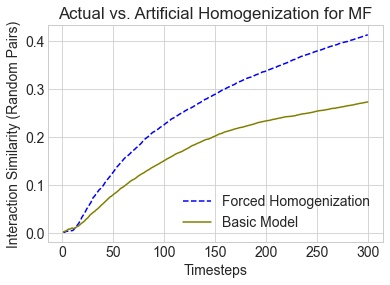

In [8]:
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 14})
plt.plot(h_df['timesteps'], h_df['interaction_similarity'], color='blue', linestyle='dashed', label='Forced Homogenization')
plt.plot(df['timesteps'], df['interaction_similarity'], color='olive', label='Basic Model')

plt.legend()
plt.xlabel("Timesteps")
plt.ylabel("Interaction Similarity (Random Pairs)")
plt.title("Actual vs. Artificial Homogenization for {}".format(model))
